# Identity Transfrom

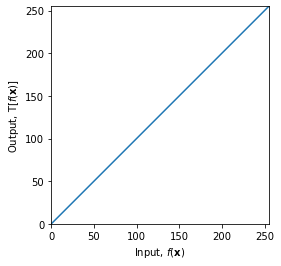

(450, 600)


In [1]:
# Identity Transfrom

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(0, 256).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img_orig = cv.imread('./images/katrina.jpg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Identity Transfrom Using NumPy Indexing

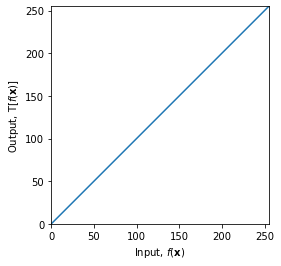

(450, 600)


In [2]:
# Identity Transfrom Using NumPy Indexing

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(0, 256).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img_orig = cv.imread('./images/katrina.jpg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = transform[img_orig]
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Negative Transform

(256,)


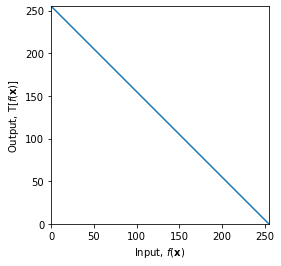

In [3]:
# Negative Transform

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(255,-1, -1).astype('uint8')
print(transform.shape)
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img_orig = cv.imread('./images/katrina.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Intensity Windowing

101
50
105
256


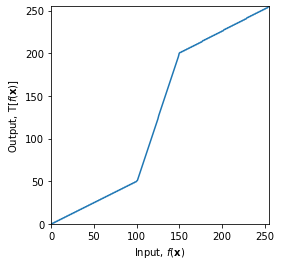

In [4]:
# Intensity Windowing

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()


img_orig = cv.imread('./images/katrina.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image",  cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


# Gamma Correction

In [5]:
# Gamma Correction

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('./images/gal.jpg', cv.IMREAD_COLOR)
print(img_orig.shape)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
gamma = 5.
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
cv.namedWindow("Gamma Corrected", cv.WINDOW_AUTOSIZE)
cv.imshow("Gamma Corrected", img_gamma)

cv.waitKey(0)
cv.destroyAllWindows()


(545, 970, 3)


# Histogram of a Grayscale Image

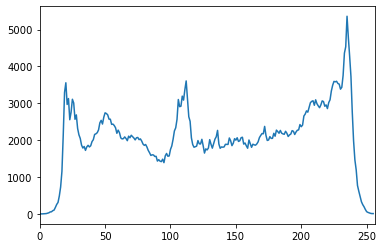

In [6]:
# Histogram of a Grayscale Image
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images/gal.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()


# Histogram of a Color Image

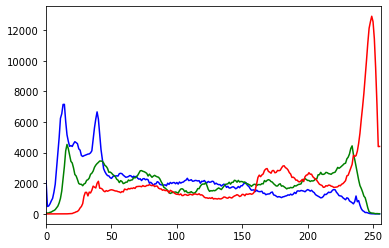

In [7]:
# Histogram of a Color Image
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images/gal.jpg', cv.IMREAD_COLOR)
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.show()

# Gamma and Histograms

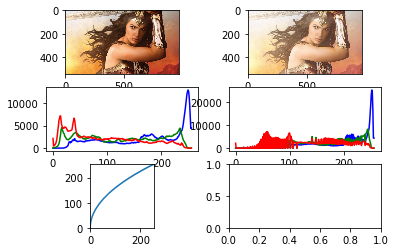

In [8]:
# Gamma and Histograms

%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('./images/gal.jpg', cv.IMREAD_COLOR)

gamma = 2
table = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

f, axarr = plt.subplots(3,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    
    
axarr[2,0].plot(table)
axarr[2,0].set_xlim(0,255)
axarr[2,0].set_ylim(0,255)
axarr[2,0].set_aspect('equal')




# Plots of$$f^\gamma$$

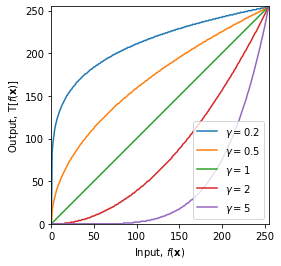

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gamma = [0.2, 0.5, 1, 2, 5]
for g in gamma:
    table = np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    ax.plot(table, label=r'$\gamma = {g}$'.format(g=g))
ax.legend(loc='best')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.savefig('transform.png')
plt.show()
    

# Histogram Equalization

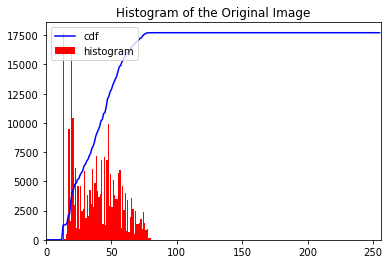

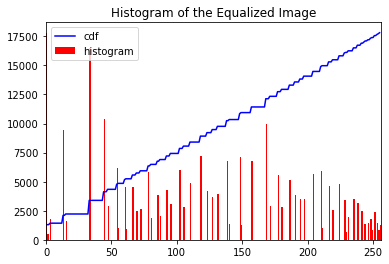

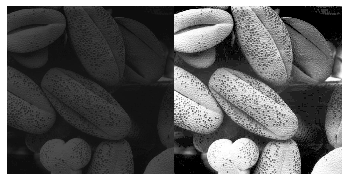

In [10]:
# Histogram Equalization
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('./images/shells.tif',cv.IMREAD_GRAYSCALE)


hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()


equ = cv.equalizeHist(img)

hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(res, cmap='gray')
#plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/shells.png')



# Zooming Images

In [46]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
im = cv.imread('./images/taylor.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

scale = 0.5
rows = int(scale*im.shape[0])
cols = int(scale*im.shape[1])

zoomed = np.zeros((rows, cols), dtype=im.dtype)



cv.namedWindow('Original', cv.WINDOW_AUTOSIZE)
cv.imshow('Original', im)
cv.waitKey(0)

cv.namedWindow('Zoomed', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()



In [40]:
print(im.shape)
print(zoomed.shape)

(282, 500)
(141, 250)


In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
im = cv.imread('./images/taylor.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

scale = 2
rows = int(scale*im.shape[0])
cols = int(scale*im.shape[1])

zoomed = np.zeros((rows, cols), dtype=im.dtype)

for i in range(0, rows):
    for j in range(0, cols):   
        zoomed[i,j] = im[int(i/scale), int(j/scale)]

cv.namedWindow('Original', cv.WINDOW_AUTOSIZE)
cv.imshow('Original', im)
cv.waitKey(0)

cv.namedWindow('Zoomed', cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()

